# Objective
To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

# Key Questions
1.	How many different segments of customers are there?
2.	How are these segments different from each other?
3.	What are your recommendations to the bank on how to better market to and service these customers?

## 1. Import Libraries and load dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [2]:
customerData = pd.read_excel("Credit Card Customer Data.xlsx")

## 2. Shape of the dataset

In [3]:
customerData.shape

(660, 7)

In [4]:
customerData.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

* No null values in data set

In [5]:
customerData.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


## 3. Univariate analysis

### 3.1 Dropping Sl_No and Customer Key column

In [6]:
customerData_short = customerData.drop({'Sl_No', 'Customer Key'}, axis=1)

### 3.2 Data types and description

In [7]:
customerData_short.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
Avg_Credit_Limit       660 non-null int64
Total_Credit_Cards     660 non-null int64
Total_visits_bank      660 non-null int64
Total_visits_online    660 non-null int64
Total_calls_made       660 non-null int64
dtypes: int64(5)
memory usage: 25.9 KB


In [8]:
customerData_short.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


### 3.3 Find duplicated rows

In [9]:
customerData_short[customerData_short.duplicated(keep=False)]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
17,8000,2,0,3,4
29,8000,4,0,4,7
56,6000,1,0,2,5
162,8000,2,0,3,4
175,6000,1,0,2,5
215,8000,4,0,4,7
250,18000,6,3,1,4
252,9000,4,5,0,4
257,10000,6,4,2,3
295,10000,6,4,2,3


* There are 22 duplicated rows

### 3.4 Remove duplicates

In [10]:
customerData_short.drop_duplicates(inplace=True)
sum(customerData_short.duplicated())

0

### 3.5 Outlier check

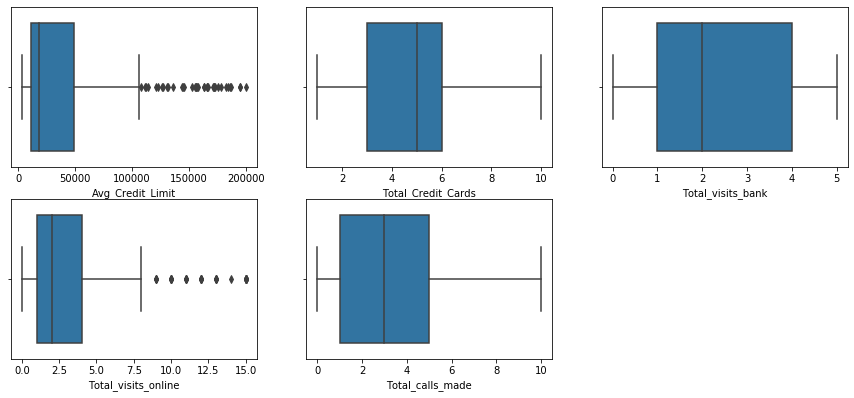

In [11]:
plt.figure(figsize=(15,10))
pos = 1
for i in customerData_short.columns:
    plt.subplot(3, 3, pos)
    sns.boxplot(customerData_short[i])
    pos += 1 

* There are many outliers in **Avg_Credit_Limit** and **Total_visits_online** columns

## 4. Bi-variate analysis

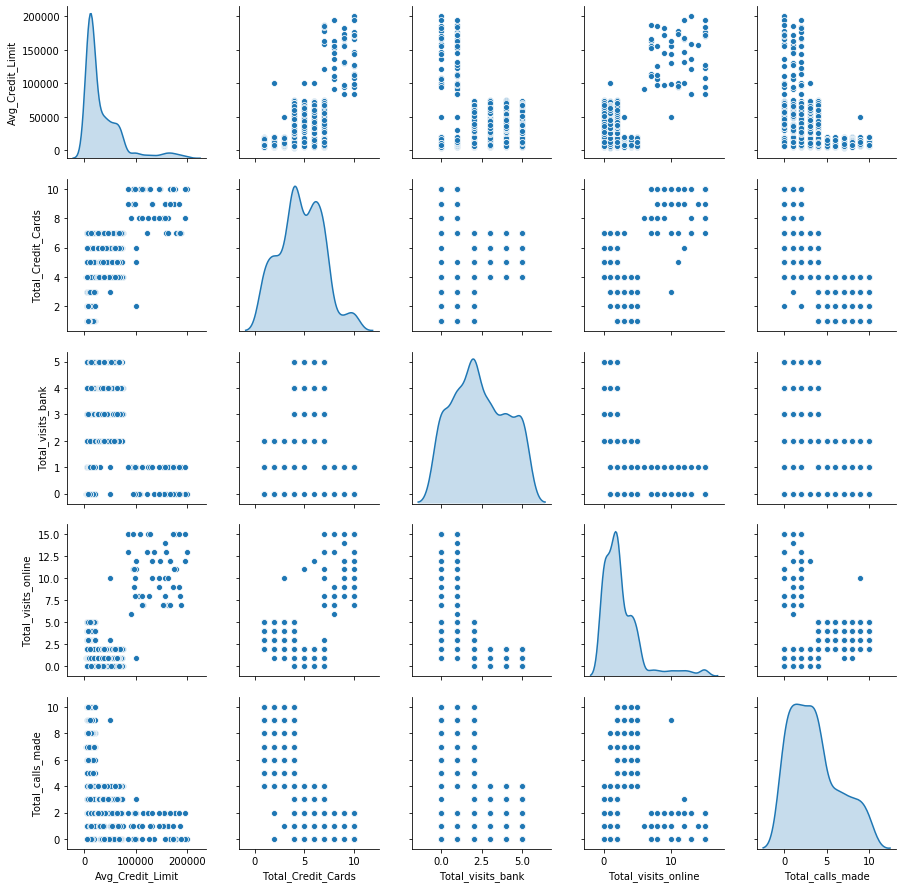

In [12]:
sns.pairplot(customerData_short, diag_kind='kde')
plt.show()

* Based on the kde plots, we can work with 2-4 clusters

## 5. Scale the data

In [13]:
from scipy.stats import zscore

customerData_z = customerData_short.apply(zscore)

In [14]:
customerData_z.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.723499,-1.247087,-0.860606,-0.550407,-1.248443
1,0.400209,-0.786701,-1.476410,2.499808,1.881237
2,0.400209,1.054846,-0.860606,0.127419,0.142526
3,-0.129107,0.134072,-0.860606,-0.550407,0.142526
4,1.723499,0.594459,-1.476410,3.177634,-0.205216


In [15]:
customerData_z.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,649.0,3.695041e-16,1.000771,-0.843684,-0.631958,-0.446697,0.373743,4.370081
Total_Credit_Cards,649.0,-8.543072e-16,1.000771,-1.707474,-0.786701,0.134072,0.594459,2.436005
Total_visits_bank,649.0,4.892508e-17,1.000771,-1.476410,-0.860606,-0.244803,0.986803,1.602607
Total_visits_online,649.0,1.375376e-16,1.000771,-0.889320,-0.550407,-0.211494,0.466331,4.194372
Total_calls_made,649.0,7.489301e-16,1.000771,-1.248443,-0.900701,-0.205216,0.490268,2.228980


## 6. Finding optimal no. of clusters using Elbow method + K-means clustering

### 6.1 Using Distortion score

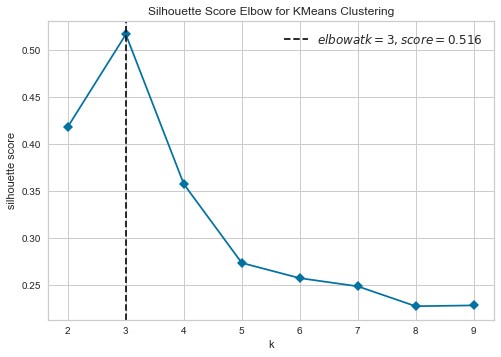

In [16]:
from yellowbrick.cluster import KElbowVisualizer # pip install yellowbrick
from sklearn.cluster import KMeans

visualizer = KElbowVisualizer(KMeans(random_state=1), k=(2,10), timings = False, locate_elbow = True, metric='silhouette')
visualizer.fit(customerData_z) 
visualizer.show() 

* According to the above graph, the optimal no. of clusters is 3

### 6.2 Using Silhouette Coefficient score

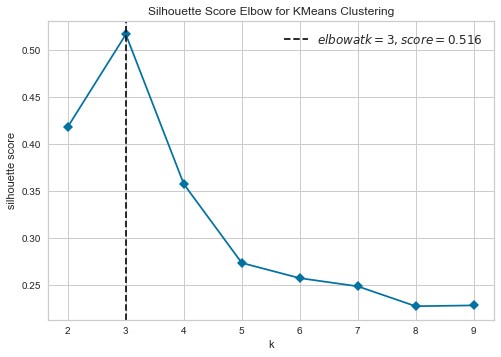

In [17]:
visualizer = KElbowVisualizer(KMeans(random_state=1), k=(2,10), timings = False, locate_elbow = True, metric='silhouette')
visualizer.fit(customerData_z) 
visualizer.show() 

* According to this graph, the optimal no. of clusters is also 3

## 7. Perform a Silhouette analysis

In [18]:
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 1 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(customerData_z)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(customerData_z, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.41800025566689647
For n_clusters = 3 The average silhouette_score is : 0.516281010855363
For n_clusters = 4 The average silhouette_score is : 0.3570238219413198
For n_clusters = 5 The average silhouette_score is : 0.2730908848204728
For n_clusters = 6 The average silhouette_score is : 0.2569035285862428
For n_clusters = 7 The average silhouette_score is : 0.24820100806368722
For n_clusters = 8 The average silhouette_score is : 0.22702515587520655
For n_clusters = 9 The average silhouette_score is : 0.227895517040229
For n_clusters = 10 The average silhouette_score is : 0.2135614321387584


* Similar to **6.3**, no. of clusters = 3 has the highest Silhouette score of 0.516, thus the optimal no. of clusters is 3

## 8. K-Means clustering analysis

In [19]:
kmeans = KMeans(n_clusters=3, random_state = 1)
kmeans.fit(customerData_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [20]:
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(customerData_z))
centroid_df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,-0.599145,-1.057516,-0.894044,0.317578,1.147989
1,-0.021354,0.372791,0.669127,-0.556683,-0.555718
2,2.809656,1.855918,-1.106928,2.804830,-0.872881


In [21]:
customerData_labels = pd.DataFrame(kmeans.labels_, columns = list(['labels']))
customerData_labels['labels'] = customerData_labels['labels'].astype('int')
customerData_labels['labels'].value_counts().sort_index()

0    221
1    378
2     50
Name: labels, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002A3961A6BC8>,
      dtype=object)

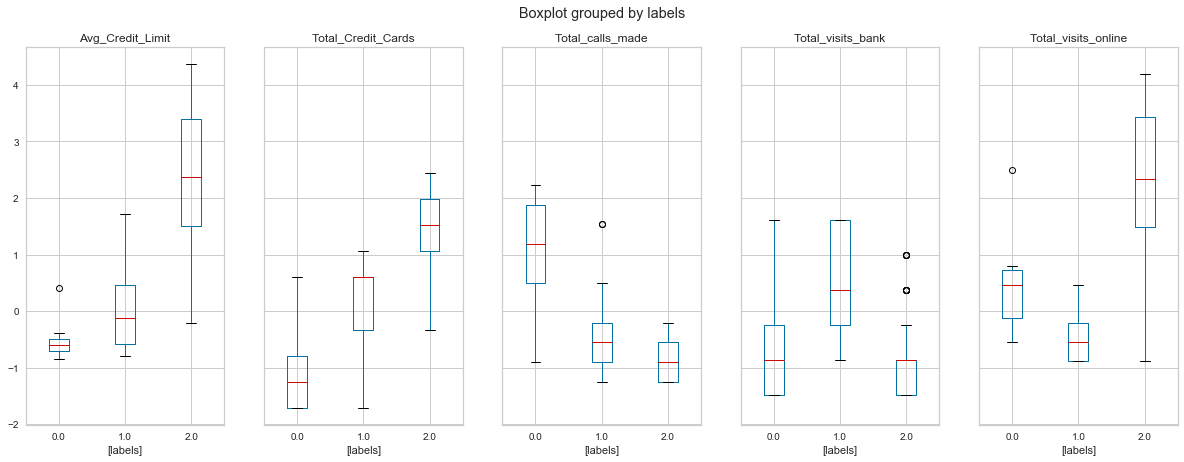

In [22]:
customerData_z.join(customerData_labels).boxplot(by='labels', layout=(1,5), figsize=(20, 7))

#### Cluster 0 has lowest {Avg_Credit_Limit, Total_Credit_Cards}, but highest Total_calls_made
> Cluster 0 customers are **poorest**, and they prefer to have queries on call centre
#### Cluster 1 has average {Avg_Credit_Limit, Total_Credit_Cards}, also highest Total_visits_bank
> Cluster 1 is the largest group, these customers are **average**, and they prefer go to the bank for enquiries
#### Cluster 2 has highest {Avg_Credit_Limit, Total_Credit_Cards}, but highest Total_visits_online
> Cluster 2 is the smallest group, but these customers are **richest**, and they prefer to contact the bank online

#### Advices for Marketing and Operation team:
> 1. Marketing team should run online personalised campaigns for Cluster 2 customers
2. Operation team should improve their bank and online service delivery model for Cluster 1 and 2 customers

## 9. Hierarchical clustering analysis

### 9.1 Generate the linkage matrix

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(customerData_z, method='ward', metric='euclidean')
Z.shape

(648, 4)

### 9.2 Plot the dendrogram

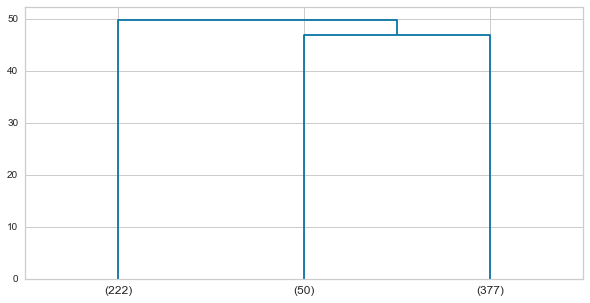

In [24]:
plt.figure(figsize=(10, 5))
dendrogram(Z,truncate_mode='lastp', p=3)
plt.show()

### 9.3 Find out the optimal distance between clusters from dendrogram

In [25]:
max_d = 40

### 9.4 Cluster data into 3 different groups

In [26]:
from scipy.cluster.hierarchy import fcluster

hierarchical_clusters = fcluster(Z, max_d, criterion='distance')

In [27]:
customerData_clusters = pd.DataFrame(hierarchical_clusters, columns = list(['clusters']))
customerData_clusters['clusters'] = customerData_clusters['clusters'].astype('int')
customerData_clusters['clusters'].value_counts().sort_index()

1    222
2     50
3    377
Name: clusters, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002A396ABF088>,
      dtype=object)

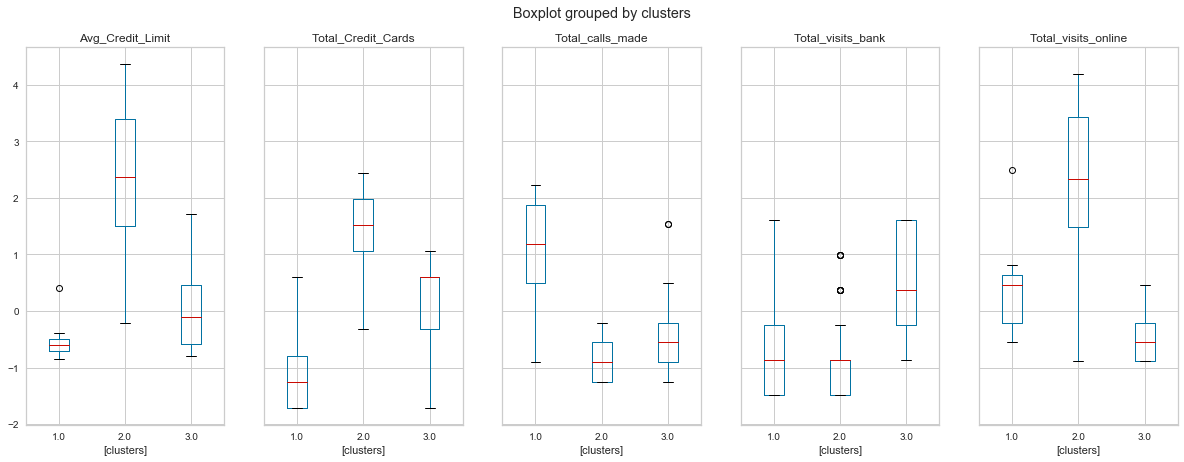

In [28]:
customerData_z.join(customerData_clusters).boxplot(by='clusters', layout=(1,5), figsize=(20, 7))

#### Summary:
> Hierarchical Cluster 1 is similar to K-Means Cluster 0<br>
> Hierarchical Cluster 2 is similar to K-Means Cluster 2<br>
> Hierarchical Cluster 3 is similar to K-Means Cluster 1